# Word Clouds from Website
`Word` clouds, also referred to as text clouds or tag clouds, function by visually emphasizing words based on their frequency in a given text source, such as a speech, blog post, or database. The more often a word appears, the larger and bolder it is displayed in the word cloud.

`word_cloud` package was developed by **Andreas Mueller**. You can learn more about the package by following this [link](https://github.com/amueller/word_cloud/).

Install and Import Required Libraries

In [6]:
# If Required Libraries are not installed in the system, following code can be used by uncommenting
# %pip install seaborn wordcloud requests beautifulsoup4

# Import Required Packages
import matplotlib as mpl
import matplotlib.pyplot as plt
import wordcloud
import requests
from bs4 import BeautifulSoup

# Import package and its set of stopwords
from wordcloud import WordCloud, STOPWORDS

print('WordCloud version: ', wordcloud.__version__) 

WordCloud version:  1.9.3


Function to Generate a Word Cloud conveniently 

> For Basic Use Cases, Nothing needs to be Changed in this Section 

However, if you need to add additional Stop Words, it can be added in this section

In [18]:
# Function to Fetch Text from a Website
def fetch_text_from_website(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    # Extract all text from paragraph tags
    paragraphs = soup.find_all('p')
    text = ' '.join([para.get_text() for para in paragraphs])
    return text

# Defining Stop Words for Word Cloud
stopwords = set(STOPWORDS)

# Additional Stop Words can be added to this list
additional_stopwords = ['said', 'says']

for word in additional_stopwords:
    stopwords.add(word)
    
def generate_wordcloud_from_website(url, max_words, colormap, background_color, font_path):
    article = fetch_text_from_website(url)
    # Instantiate a word cloud object
    wordcloud_params = {
        'height': 800,
        'width': 1200,
        'background_color': background_color,
        'max_words': max_words,
        'stopwords': stopwords,
        'scale': 1,
        'colormap': colormap,
        'contour_color': 'white',
        'contour_width': 1
    }
    # Add font_path to parameters only if provided
    if font_path:
        wordcloud_params['font_path'] = font_path
    
    wordcloud_obj = WordCloud(**wordcloud_params).generate(article)
    # Display the cloud
    fig = plt.figure(figsize=(20, 10))

    plt.imshow(wordcloud_obj, interpolation='bilinear')
    plt.axis('off')
    plt.show()

Changing The Following Parameters are Sufficient to Generate a Word Cloud

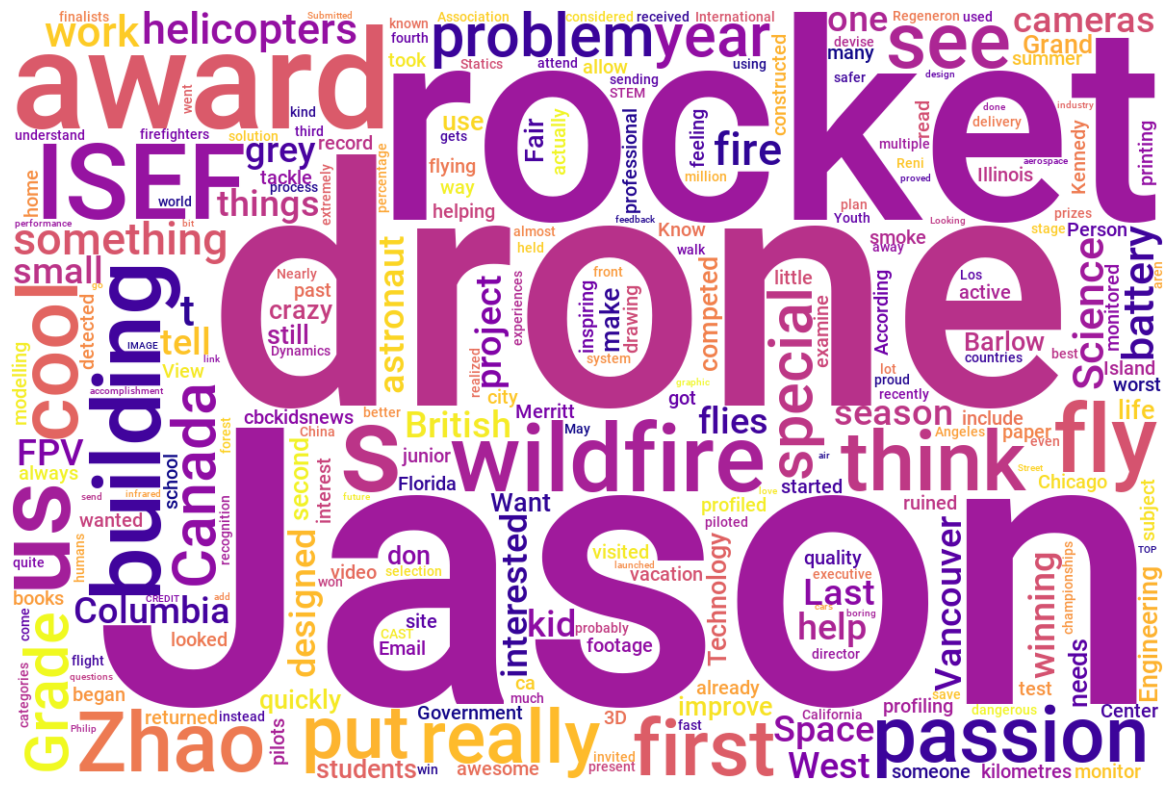

In [28]:
# Change URL to the desired website
website_url = 'https://www.cbc.ca/kidsnews/post/profile-this-b.c-teen-designed-a-rocket-to-keep-an-eye-on-wildfires'

# Max Word Count for WordCloud
max_word = 2000

# Change Background Colour
bg_color = 'white'

# Change Colour Map
# Full List of Colormaps can be Found Here: https://matplotlib.org/stable/users/explain/colors/colormaps.html
colormap = 'plasma'

# Change Font
# Custom Fonts can be used by specifying the file path for the ttf or otf file 
# If Not Using Custom Fonts set font_path = None
font_path = 'Roboto-Medium.ttf'

generate_wordcloud_from_website(url=website_url, max_words=max_word, colormap=colormap, background_color=bg_color, font_path=font_path)


### Author

<a href ="https://www.linkedin.com/in/amuntasir/">Ahmed Muntasir</a>